In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/10
93/93 [==============================] - 44s 464ms/step - loss: 1.9618 - accuracy: 0.3076 - val_loss: 1.1595 - val_accuracy: 0.5730
Epoch 2/10
93/93 [==============================] - 43s 463ms/step - loss: 0.9508 - accuracy: 0.6469 - val_loss: 0.7992 - val_accuracy: 0.7159
Epoch 3/10
93/93 [==============================] - 43s 465ms/step - loss: 0.5759 - accuracy: 0.7856 - val_loss: 0.5135 - val_accuracy: 0.8053
Epoch 4/10
93/93 [==============================] - 43s 463ms/step - loss: 0.4046 - accuracy: 0.8394 - val_loss: 0.4812 - val_accuracy: 0.7849
Epoch 5/10
93/93 [==============================] - 43s 457ms/step - loss: 0.3668 - accuracy: 0.8590 - val_loss: 0.5968 - val_accuracy: 0.8085
Epoch 6/10
93/93 [==============================] - 43s 460ms/step - loss: 0.2627 - accuracy: 0.8916 - val_loss: 0.3964 - val_accuracy: 0.8493
Epoch 7/10
93/93 [==============================] - 43s 462ms/step - loss: 0.2182 - accuracy: 0.9142 - val_loss: 0.4526 - val_accuracy: 0.8399

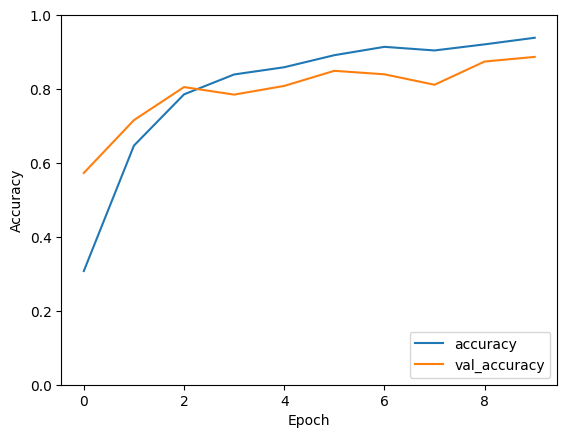

20/20 [==============================] - 2s 113ms/step


In [ ]:
# Charger les images et les étiquettes
data_dir = "/content/drive/MyDrive/MedicalWaste"
classes = os.listdir(data_dir)
images = []
labels = []

for i, classe in enumerate(classes):
    path = os.path.join(data_dir, classe)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        img_array = cv2.resize(img_array, (100, 100))  # Ajustez la taille selon vos besoins
        images.append(img_array)
        labels.append(i)

# Convertir en tableau NumPy
images = np.array(images)
labels = np.array(labels)

# Normaliser les valeurs des pixels
images = images / 255.0

# Diviser les données en ensembles d'entraînement, de validation et de test
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

predictions = model.predict(x_test)


In [ ]:
# ... Votre code existant ...

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Obtenez les probabilités des classes pour chaque échantillon de test
y_probs = model.predict(x_test)

# Obtenez les classes prédites en choisissant l'indice avec la probabilité la plus élevée
y_pred = np.argmax(y_probs, axis=1)

# Calcul de la précision avec Scikit-learn
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (using Scikit-learn): {accuracy}")



20/20 [==============================] - 5s 219ms/step - loss: 0.3271 - accuracy: 0.8901
Test Accuracy: 0.8901098966598511
20/20 [==============================] - 2s 110ms/step
Accuracy (using Scikit-learn): 0.8901098901098901
Accuracy (using Scikit-learn): 0.8901098901098901


20/20 [==============================] - 2s 106ms/step - loss: 0.3271 - accuracy: 0.8901
Test Accuracy: 0.8901098966598511


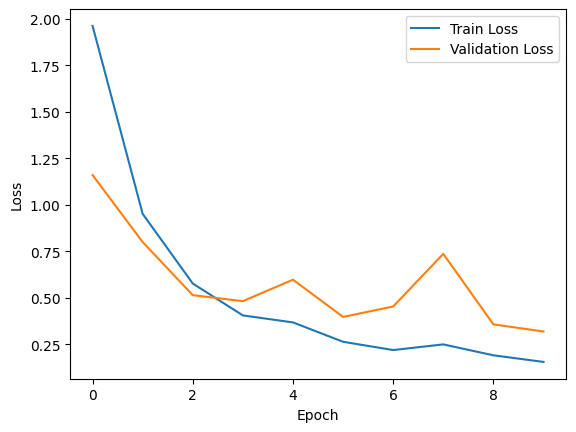

In [ ]:
# ... Votre code existant ...

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Tracé de la courbe de perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


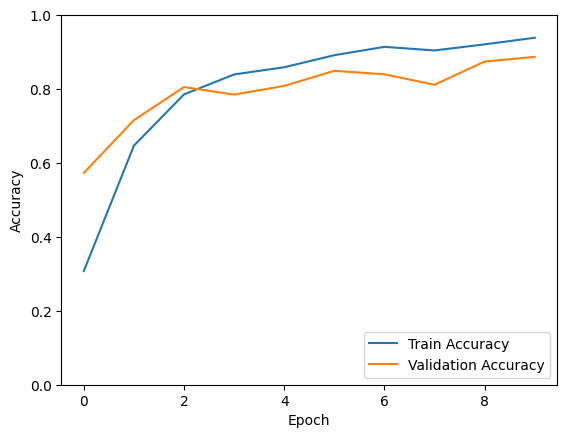

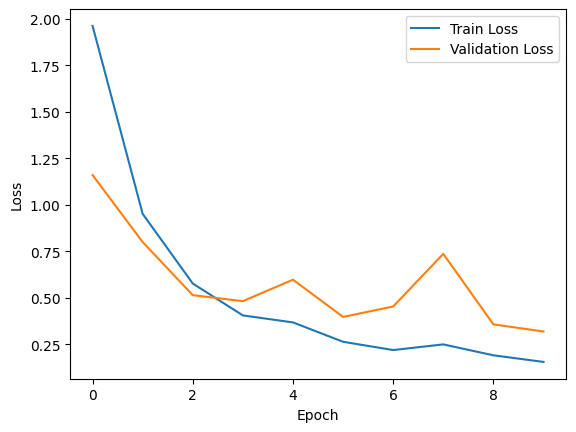

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Tracé de la courbe de perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


20/20 [==============================] - 4s 183ms/step - loss: 0.3271 - accuracy: 0.8901
Test Accuracy: 0.8901098966598511
20/20 [==============================] - 3s 161ms/step


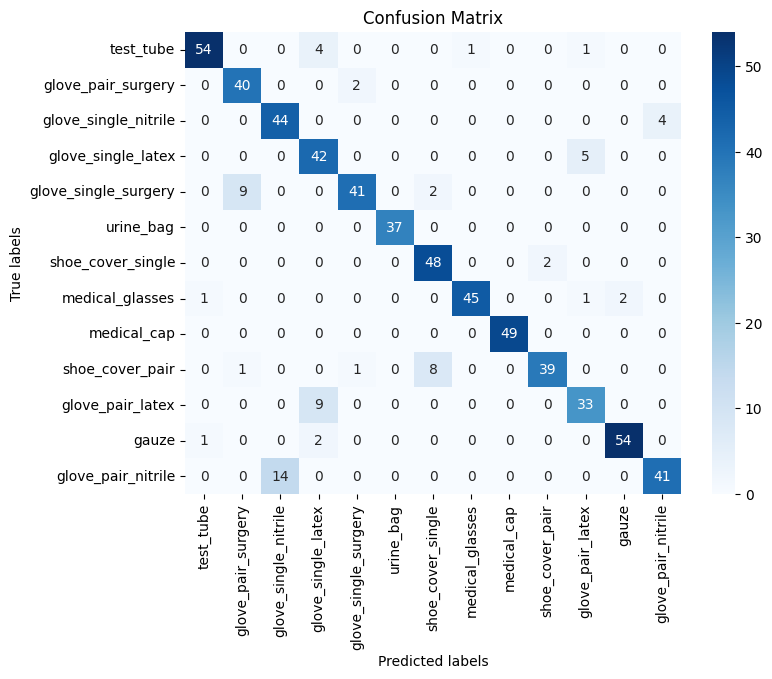

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... Votre code existant ...

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Obtenez les probabilités des classes pour chaque échantillon de test
y_probs = model.predict(x_test)

# Obtenez les classes prédites en choisissant l'indice avec la probabilité la plus élevée
y_pred = np.argmax(y_probs, axis=1)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Tracé de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import recall_score, precision_score

# ... Votre code existant ...

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Obtenez les probabilités des classes pour chaque échantillon de test
y_probs = model.predict(x_test)

# Obtenez les classes prédites en choisissant l'indice avec la probabilité la plus élevée
y_pred = np.argmax(y_probs, axis=1)

# Calcul du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# Calcul de la précision (precision)
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")


20/20 [==============================] - 6s 284ms/step - loss: 0.3271 - accuracy: 0.8901
Test Accuracy: 0.8901098966598511
20/20 [==============================] - 2s 110ms/step
Recall: 0.8901098901098901
Precision: 0.8989109988053156


In [ ]:
from sklearn.metrics import f1_score

# ... Votre code existant ...

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Obtenez les probabilités des classes pour chaque échantillon de test
y_probs = model.predict(x_test)

# Obtenez les classes prédites en choisissant l'indice avec la probabilité la plus élevée
y_pred = np.argmax(y_probs, axis=1)

# Calcul du F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


20/20 [==============================] - 6s 287ms/step - loss: 0.3271 - accuracy: 0.8901
Test Accuracy: 0.8901098966598511
20/20 [==============================] - 3s 158ms/step
F1 Score: 0.8906216447811554


In [ ]:
from sklearn.metrics import roc_curve, auc

# ... Votre code existant ...

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Obtenez les probabilités des classes pour chaque échantillon de test
y_probs = model.predict(x_test)

# Calcul des courbes ROC et des aires sous les courbes (AUC)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcul de l'AUC moyenne sur toutes les classes
mean_auc = np.mean(list(roc_auc.values()))
print(f"Mean AUC: {mean_auc}")

20/20 [==============================] - 4s 180ms/step - loss: 0.3271 - accuracy: 0.8901
Test Accuracy: 0.8901098966598511
20/20 [==============================] - 2s 110ms/step
Mean AUC: 0.9958570655981134


20/20 [==============================] - 3s 142ms/step - loss: 0.3271 - accuracy: 0.8901
Test Accuracy: 0.8901098966598511
20/20 [==============================] - 4s 182ms/step


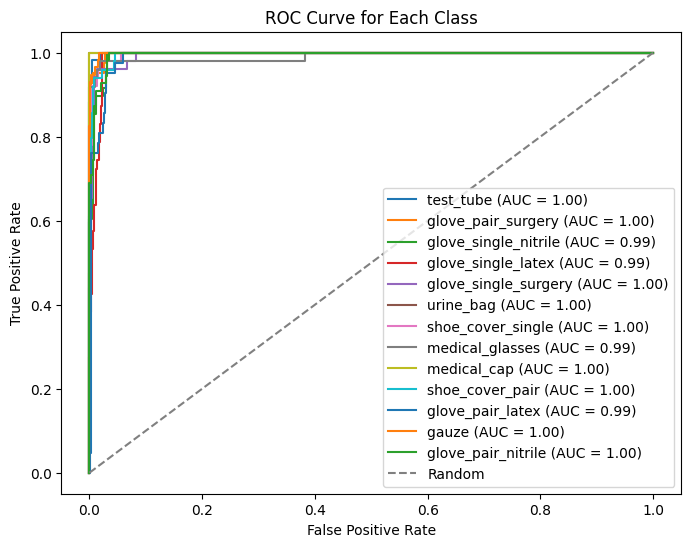

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ... Votre code existant ...

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Obtenez les probabilités des classes pour chaque échantillon de test
y_probs = model.predict(x_test)

# Tracé des courbes ROC pour chaque classe
plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Sauvegarder le modèle
model.save("x_test.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# On peut auss preciser le chemin ou le fichier sera sauvgardé

# Enregistrement du modèle au format h5
model.save('/content/drive/MyDrive/MedicalWaste/x_test.h5')

# Affichage du chemin du fichier sauvegardé
print("Modèle enregistré avec succès au format h5.")


Modèle enregistré avec succès au format h5.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model("x_test.h5")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Charger une nouvelle image pour la prédiction
img_path = "/content/drive/MyDrive/images.jpg"
img = image.load_img(img_path, target_size=(100, 100))  # Redimensionnez selon vos besoins
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Ajoutez une dimension batch
img_array /= 255.0  # Normalisez les valeurs des pixels (selon votre prétraitement)


In [ ]:
predictions = model.predict(img_array)


1/1 [==============================] - 0s 186ms/step


In [ ]:
predicted_class_index = np.argmax(predictions)
predicted_class = classes[predicted_class_index]
print(f"La classe prédite est : {predicted_class}")


La classe prédite est : test_tube
